In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Đọc file data_train_cleaned.csv sau khi tiền xử lý đề EDA
df_train = pd.read_csv('data_train_cleaned.csv')

df_train.head()

,id,name,gender,age,education,profession,income,living_with,nation,phone,...,viettel_no_1,viettel_no_2,to_hanoi,to_other,score,number_of_suggestions,number_of_plans,number_of_accept,number_of_accept_2,mobile_plan
0,11156,Rachel Gibbs,Female,21,Unknown,Unemployed,9.384000e+08,Unmarried_2,Australia,(08)-8012-7556,...,0,0,0,1,0,3,2,1.0,1,DATASILVER
1,4297,Karen Anderson,Other,22,Unknown,Unemployed,9.840000e+08,Unmarried_2,England,943-646-5203,...,1,0,0,1,0,4,3,1.0,1,SOCIALMEDIAGOLD
2,13301,김지원,Female,24,Unknown,Unemployed,1.063200e+09,Unmarried_1,Korea,010-4500-9888,...,1,0,0,1,0,4,3,1.0,1,DATASILVER
3,9920,Elisabeth Wähner,Female,24,Unknown,Unemployed,1.065600e+09,Unmarried_1,Denmark,+49(0) 587406963,...,1,0,0,1,30,2,2,1.0,1,SOCIALMEDIAGOLD
4,8424,Sra. Maria Luiza Nogueira,Female,25,Unknown,Unemployed,1.100000e+09,Unmarried_1,Brazil,(084) 0568 1445,...,1,0,0,1,0,2,2,1.0,1,DATASILVER


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11572 entries, 0 to 11571
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     11572 non-null  int64  
 1   name                   11572 non-null  object 
 2   gender                 11572 non-null  object 
 3   age                    11572 non-null  int64  
 4   education              11572 non-null  object 
 5   profession             11572 non-null  object 
 6   income                 11572 non-null  float64
 7   living_with            11572 non-null  object 
 8   nation                 11572 non-null  object 
 9   phone                  11572 non-null  object 
 10  job                    11572 non-null  object 
 11  fb_freq                11572 non-null  int64  
 12  yt_freq                11572 non-null  int64  
 13  tik_freq               11572 non-null  int64  
 14  use_less_than_2GB      11572 non-null  int64  
 15  us

# **1. Phân tích nhân khẩu học**

## **1.1. Giới tính (gender)**

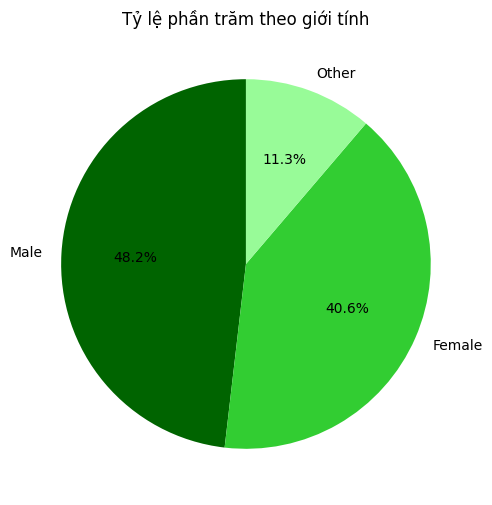

In [ ]:
gender_counts = df_train['gender'].value_counts()  # Đếm số lượng theo giới tính
gender_percent = gender_counts / gender_counts.sum() * 100  # Chuyển thành %

# Vẽ biểu đồ tròn
plt.figure(figsize=(6,6))
plt.pie(gender_percent, labels=gender_percent.index, autopct='%1.1f%%', startangle=90, colors=['#006400', '#32CD32', '#98FB98'])
plt.title('Tỷ lệ phần trăm theo giới tính')
plt.show()

**Remarks:** Nam chiếm tỷ lệ cao nhất **(48.2%)**, tiếp theo là nữ **(40.6%)**. Giới tính khác chiếm tỉ lệ khá nhỏ.

## **1.2. Trình độ học vấn (education)**

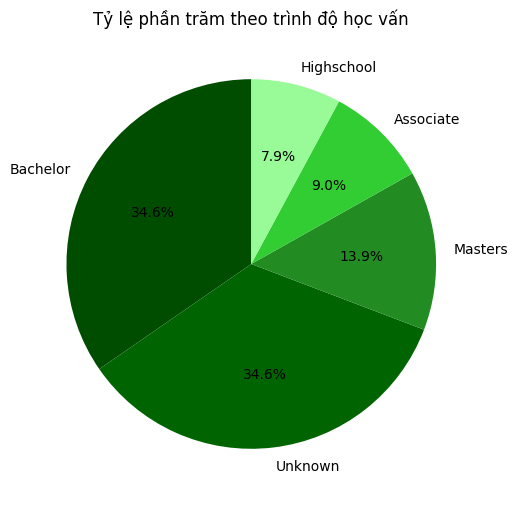

In [ ]:
# Đếm số lượng theo education
edu_counts = df_train['education'].value_counts()
edu_percent = edu_counts / edu_counts.sum() * 100

plt.figure(figsize=(6,6))
plt.pie(
    edu_percent,
    labels=edu_percent.index,
    autopct='%1.1f%%',
    startangle=90,
    colors= ['#004d00', '#006400', '#228B22', '#32CD32', '#98FB98']
)
plt.title('Tỷ lệ phần trăm theo trình độ học vấn')
plt.show()

**Remarks:** Tỷ lệ trình độ học vấn **Bachelor** và **Unknown (không rõ)** là như nhau, cụ thể **34.6%**. 3 nhóm còn lại là **Masters**, **Associate** và **Highschool** chiếm tỷ lệ dưới **15%** mỗi nhóm.

## **1.3. Tuổi tác (Age)**

In [ ]:
# Tạo cột Age_quartile từ các tứ phân vị của Age gồm có 4 khoảng: 18-25, 25-31, 31-41, 41+.
bins = [18, 25, 31, 41, df_train['age'].max() + 1]  # Thêm 1 để bao gồm tuổi max
labels = ['18-25', '25-31', '31-41', '41+']
df_train['age_quartile'] = pd.cut(df_train['age'], bins=bins, labels=labels, right=False)

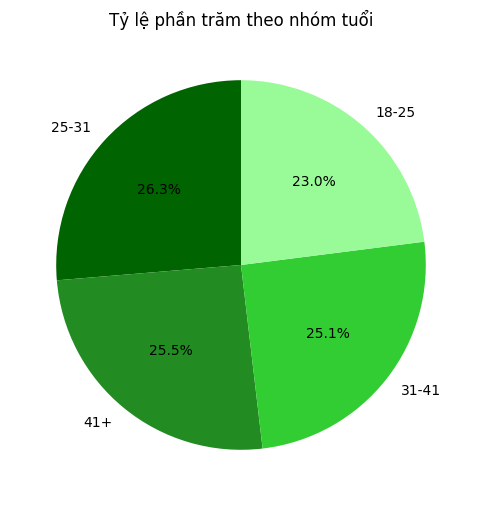

In [ ]:
# Đếm số lượng theo Age_quartile
age_counts = df_train['age_quartile'].value_counts()
age_percent = age_counts / age_counts.sum() * 100

# Chọn màu xanh lá từ đậm → sáng cho 4 nhóm tuổi
colors = ['#006400', '#228B22', '#32CD32', '#98FB98']

plt.figure(figsize=(6,6))
plt.pie(
    age_percent,
    labels=age_percent.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Tỷ lệ phần trăm theo nhóm tuổi')
plt.show()

**Remarks:** Các nhóm tuổi phân bố **khá đồng đều**, trong đó nhóm **25–31** **cao nhất**, nhóm **18–25 thấp nhất**. Tổng thể tập trung chủ yếu ở độ tuổi lao động 25–41.

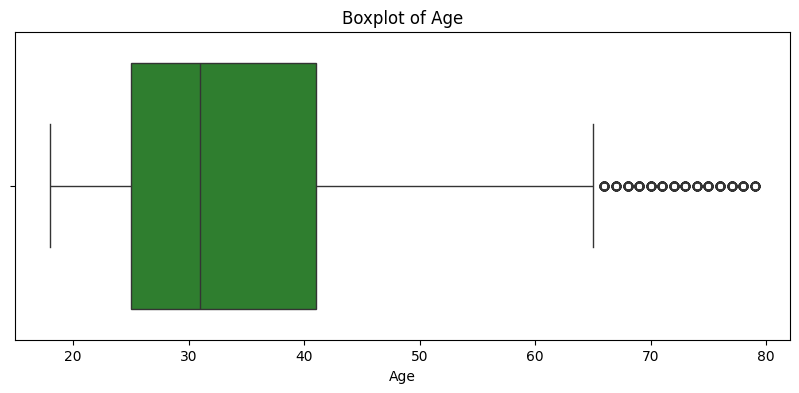

In [7]:
# Boxplot cho tuổi tác (Age)
plt.figure(figsize=(10,4))
sns.boxplot(x=df_train['age'], orient='h', color = '#228B22')  # horizontal
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.show()

**Remarks:** Tuổi **trung vị** nằm khoảng **30–35**, với phần lớn người dùng trong khoảng **25–42** tuổi. Phân bố **lệch phải nhẹ**, cho thấy đa số là **người trẻ**, nhưng vẫn xuất hiện một số **outliers trên 65 tuổi**.

## **1.4. Tình trạng việc làm (profession)**

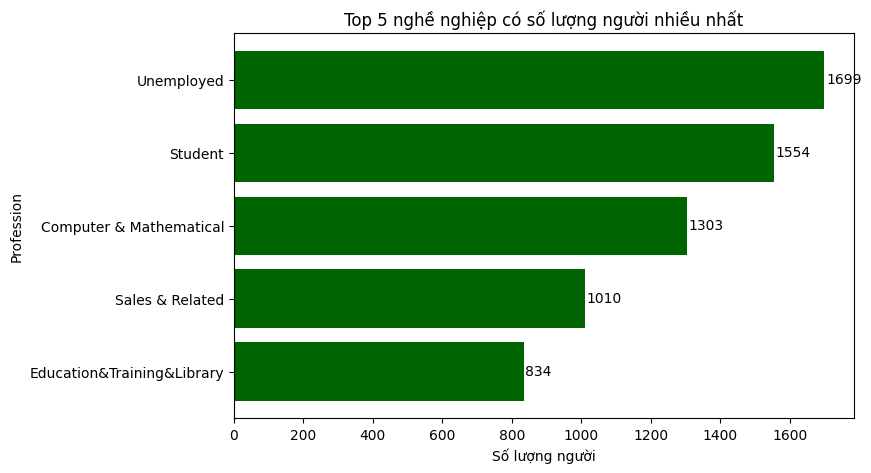

In [ ]:
# Top 5 nghề nghiệp có số lượng người nhiều nhất
# Đếm số lượng theo profession và lấy Top 5
top5_prof = df_train['profession'].value_counts().head(5)

# Vẽ bar chart ngang
plt.figure(figsize=(8,5))
bars = plt.barh(top5_prof.index, top5_prof.values, color='#006400')
plt.xlabel('Số lượng người')
plt.ylabel('Profession')
plt.title('Top 5 nghề nghiệp có số lượng người nhiều nhất')
plt.gca().invert_yaxis()  # Đảo thứ tự để nghề nhiều nhất ở trên
# Hiển thị số lượng trên mỗi thanh
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, str(width), va='center')
plt.show()

**Remarks:** Nhóm **Unemployed** và **Student** chiếm tỷ lệ **cao nhất**, tiếp theo là **Computer & Mathematical, Sales & Related và Education/Training/Library**. Điều này cho thấy tập du khách chủ yếu đến từ **nhóm chưa đi làm chính thức** (sinh viên, thất nghiệp) và **nhóm ngành công nghệ**, những đối tượng có xu hướng sử dụng Internet nhiều.

## **1.5. Khu vực (nation)**

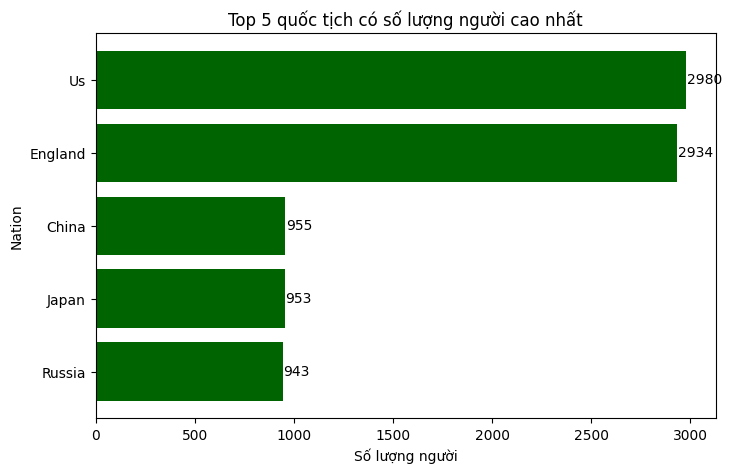

In [ ]:
# Top 5 khu vực có số lượng người nhiều nhất
top5_nation = df_train['nation'].value_counts().head(5)

plt.figure(figsize=(8,5))
bars = plt.barh(top5_nation.index, top5_nation.values, color='darkgreen')
plt.xlabel('Số lượng người')
plt.ylabel('Nation')
plt.title('Top 5 quốc tịch có số lượng người cao nhất')
plt.gca().invert_yaxis()  # Đảo thứ tự: nhiều nhất ở trên

# Hiển thị số lượng trên mỗi thanh
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, str(width), va='center')

plt.show()

**Remarks:** Khách hàng chủ yếu đến từ **Mỹ và Anh**, với số lượng **vượt trội** so với các quốc gia còn lại.

## **1.6. Tình trạng hôn nhân (marriage_status)**

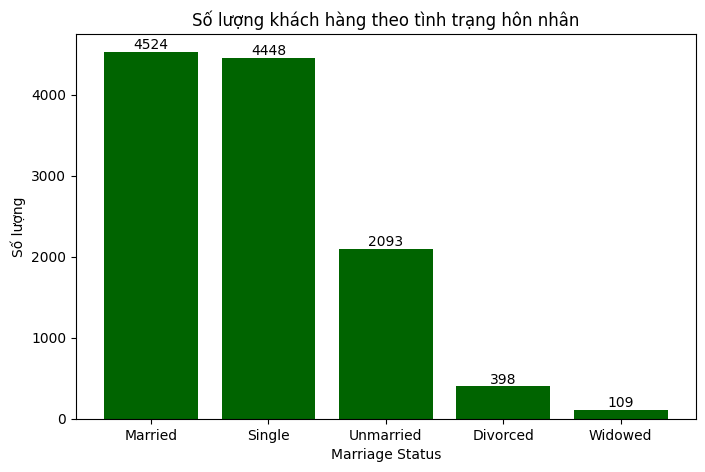

In [ ]:
# Số lượng người theo từng tình trạng hôn nhân
# Đếm số lượng từng nhóm
marriage_counts = df_train['marriage_status'].value_counts()

# Vẽ bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(marriage_counts.index, marriage_counts.values, color='darkgreen')

plt.title("Số lượng khách hàng theo tình trạng hôn nhân")
plt.xlabel("Marriage Status")
plt.ylabel("Số lượng")

# Hiển thị giá trị số trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             str(height),
             ha='center', va='bottom')

plt.show()


**Remarks:** Phần lớn khách hàng là **đã kết hôn và độc thân**, trong đó hai nhóm này chiếm **áp đảo** so với các nhóm còn lại.

## **1.7. Số lượng con (number_child)**

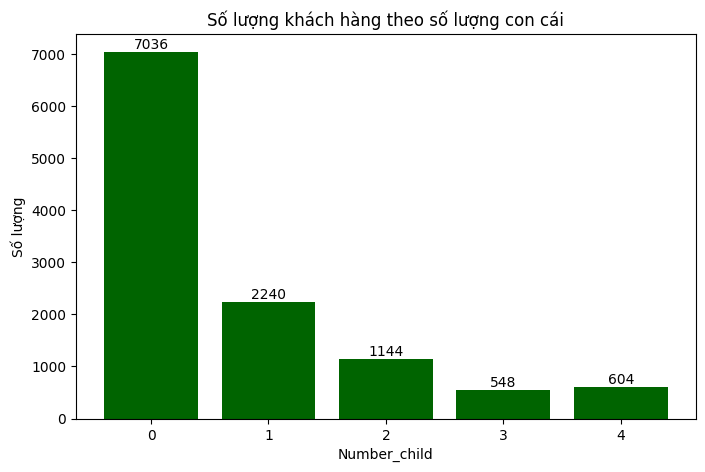

In [ ]:
# Số lượng người theo từng số lượng con
# Đếm số lượng từng nhóm
number_child_counts = df_train['number_child'].value_counts()

# Vẽ bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(number_child_counts.index, number_child_counts.values, color='darkgreen')

plt.title("Số lượng khách hàng theo số lượng con cái")
plt.xlabel("Number_child")
plt.ylabel("Số lượng")

# Hiển thị giá trị số trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             str(height),
             ha='center', va='bottom')

plt.show()


**Remarks:** Phần lớn khách hàng không có con **(7036 người)**. Số lượng giảm dần theo số con, trong đó nhóm có **1–2 con chiếm ít hơn đáng kể**, còn nhóm **3–4 con rất ít.**

## **1.8. Mức thu nhập (income)**

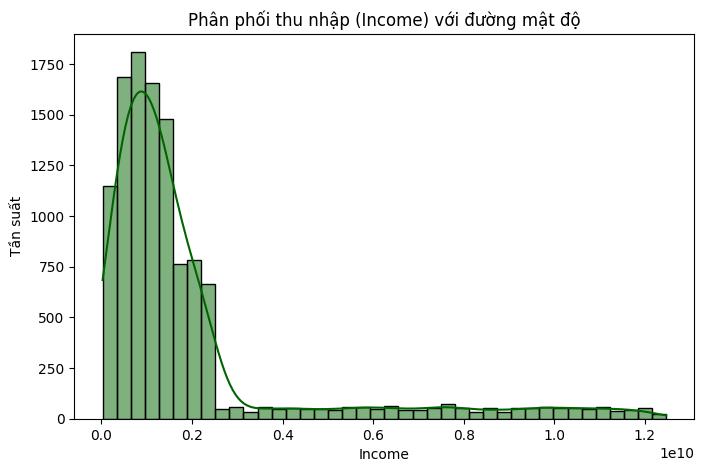

In [ ]:
# Vẽ histogram biểu thị tần suất các giá trị của cột income với đường mật độ
plt.figure(figsize=(8,5))
sns.histplot(df_train['income'], bins=40, edgecolor='black', color='darkgreen', kde=True)
plt.title("Phân phối thu nhập (Income) với đường mật độ")
plt.xlabel("Income")
plt.ylabel("Tần suất")
plt.show()

**Remarks:** Phân phối thu nhập **lệch phải**, phần lớn khách hàng có thu nhập **thấp đến trung bình**, chỉ có một số ít người thu nhập rất cao, tạo ra phần đuôi dài về bên phải.

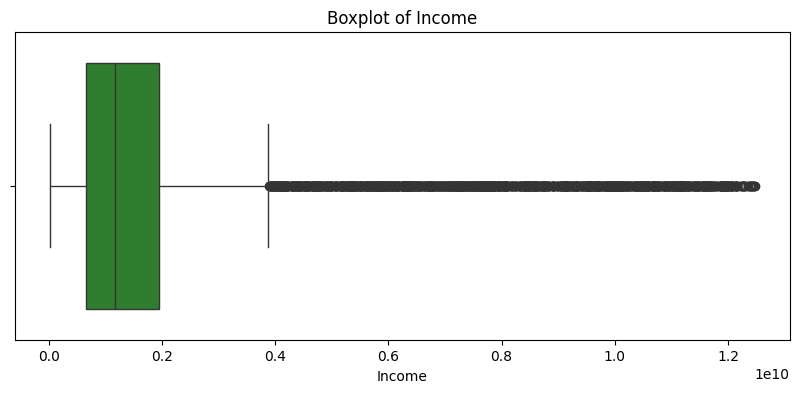

In [8]:
# Boxplot của Mức thu nhập (Income)
plt.figure(figsize=(10,4))
sns.boxplot(x=df_train ['income'], orient='h', color='#228B22')
plt.title("Boxplot of Income")
plt.xlabel("Income")
plt.show()

# **2. Phân tích hành vi khách hàng:**

## **2.1. Mục đích chuyến đi (purpose)**

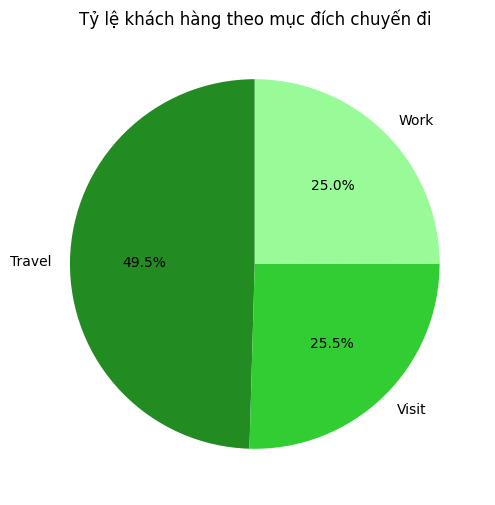

In [ ]:
# Tỷ lệ khách hàng theo mục đích chuyến đi
# Đếm số lượng theo purpose
purpose_counts = df_train['purpose'].value_counts()
purpose_percent = purpose_counts / purpose_counts.sum() * 100

plt.figure(figsize=(6,6))
plt.pie(
    purpose_percent,
    labels=purpose_percent.index,
    autopct='%1.1f%%',
    startangle=90,
    colors= ['#228B22', '#32CD32', '#98FB98']
)
plt.title('Tỷ lệ khách hàng theo mục đích chuyến đi')
plt.show()

**Remarks:** Phần lớn du khách đến Việt Nam với mục đích **du lịch (49.5%)**, trong khi mục đích **thăm viếng và làm việc** chiếm tỷ lệ **thấp hơn** nhưng khá tương đương nhau.

## **2.2. Đối tượng đi cùng (go_with)**

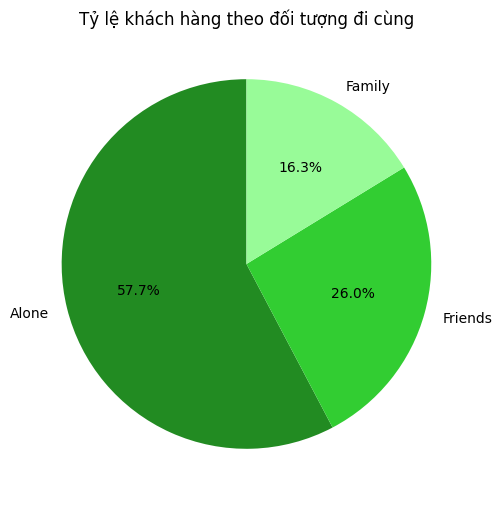

In [ ]:
# Tỷ lệ khách hàng theo đối tượng đi cùng
# Đếm số lượng theo go_with
go_with_counts = df_train['go_with'].value_counts()
go_with_percent = go_with_counts / go_with_counts.sum() * 100

plt.figure(figsize=(6,6))
plt.pie(
    go_with_percent,
    labels=go_with_percent.index,
    autopct='%1.1f%%',
    startangle=90,
    colors= ['#228B22', '#32CD32', '#98FB98']
)
plt.title('Tỷ lệ khách hàng theo đối tượng đi cùng')
plt.show()

**Remarks:** Phần lớn du khách **đi một mình (57.7%)**, tiếp theo là đi cùng **bạn bè**, trong khi nhóm đi cùng **gia đình** chiếm tỷ lệ thấp nhất.

## **2.3. Thời điểm đáp máy bay (time)**

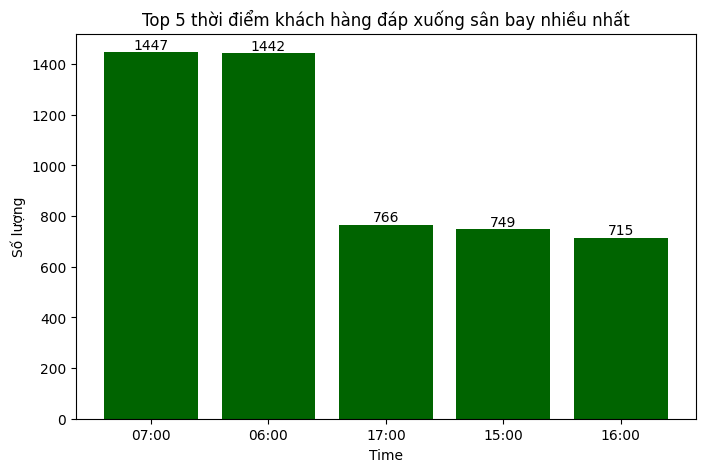

In [ ]:
# Top 5 thời điểm mà khách hàng đáp xuống sân bay nhiều nhất
top5_time = df_train['time'].value_counts().head(5)

plt.figure(figsize=(8,5))
bars = plt.bar(top5_time.index, top5_time.values, color = "darkgreen")

plt.title("Top 5 thời điểm khách hàng đáp xuống sân bay nhiều nhất")
plt.xlabel("Time")
plt.ylabel("Số lượng")

# Hiển thị số trên đầu cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             str(int(height)),
             ha='center', va='bottom')

plt.show()

**Remarks:** Khách hàng có xu hướng đáp xuống sân bay **nhiều nhất vào buổi sáng sớm**, sau đó là buổi chiều.

## **2.4. Địa điểm di chuyển sau khi đáp máy bay (to_hanoi & to_other)**

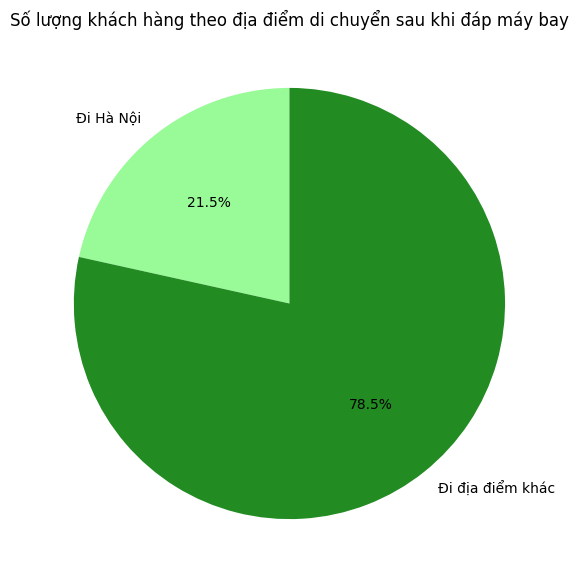

In [ ]:
# Số lượng khách hàng theo địa điểm di chuyển sau khi đáp máy bay
# Tính tổng số lượng
hanoi_count = df_train['to_hanoi'].sum()
other_count = df_train['to_other'].sum()

labels = ['Đi Hà Nội', 'Đi địa điểm khác']
values = [hanoi_count, other_count]

plt.figure(figsize=(7,7))
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors= [ '#98FB98', '#228B22']
)

plt.title("Số lượng khách hàng theo địa điểm di chuyển sau khi đáp máy bay")
plt.show()

**Remarks:** Khách hàng có xu hướng di chuyển tới **nơi
khác (78.5%)** sau khi đáp máy bay

## **2.5. Điểm Viettel++ (score)**

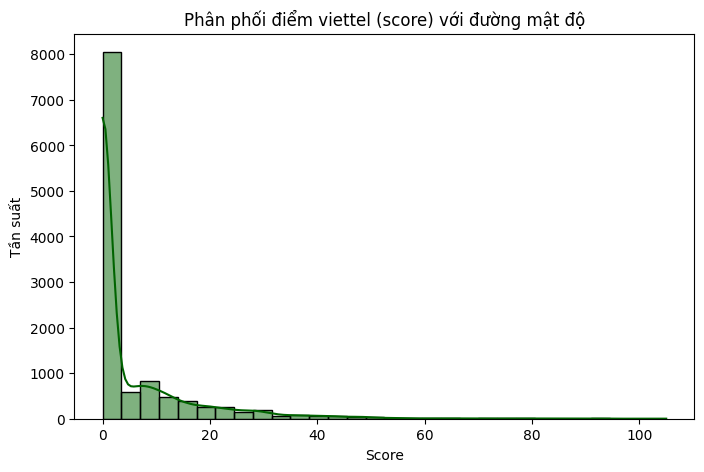

In [ ]:
# Vẽ histogram phân phối cột score
plt.figure(figsize=(8,5))
sns.histplot(df_train['score'], bins=30, edgecolor='black', color='darkgreen', kde=True)
plt.title("Phân phối điểm viettel (score) với đường mật độ")
plt.xlabel("Score")
plt.ylabel("Tần suất")
plt.show()

**Remarks:** Phân phối **score lệch phải**, đa số khách hàng không có hoặc có rất ít điểm, chỉ một số ít đạt điểm cao, tạo đuôi dài về bên phải.

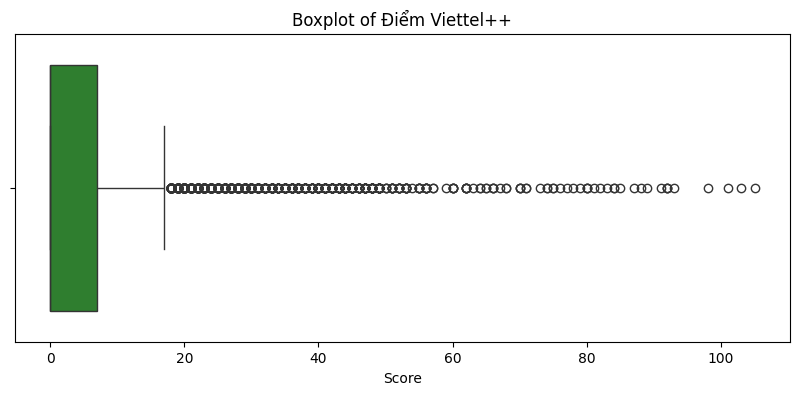

In [9]:
# Boxplot của Điểm Viettel++ (Score)
plt.figure(figsize=(10,4))
sns.boxplot(x=df_train ['score'], orient='h', color='#228B22')
plt.title("Boxplot of Điểm Viettel++")
plt.xlabel("Score")
plt.show()

## **2.6. Tỷ lệ chấp nhận (accept) theo đồi tượng đi cùng (go_with)**

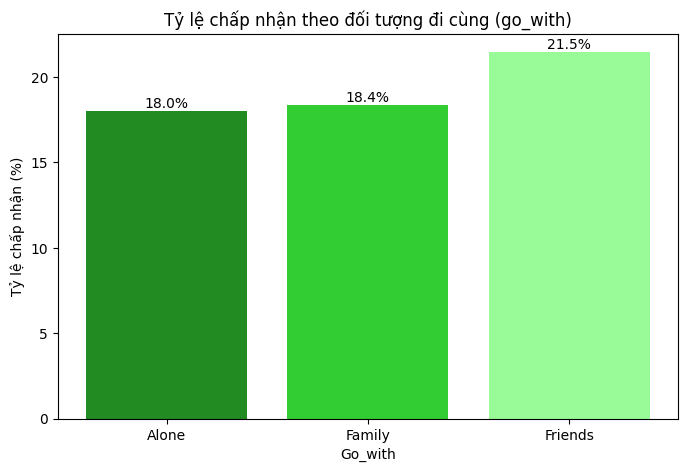

In [ ]:
# Tính tỷ lệ accept theo từng nhóm go_with

# Group theo go_with và cộng tổng
grouped = df_train.groupby('go_with').agg({
    'number_of_accept': 'sum',
    'number_of_suggestions': 'sum'
})

# Tính tỷ lệ %
grouped['accept_rate'] = grouped['number_of_accept'] / grouped['number_of_suggestions'] * 100

# Vẽ biểu đồ
plt.figure(figsize=(8,5))
bars = plt.bar(grouped.index, grouped['accept_rate'], color = ['#228B22', '#32CD32', '#98FB98'] )

plt.title("Tỷ lệ chấp nhận theo đối tượng đi cùng (go_with)")
plt.xlabel("Go_with")
plt.ylabel("Tỷ lệ chấp nhận (%)")

# Ghi số %
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f"{height:.1f}%",
             ha='center', va='bottom')

plt.show()

**Remarks:** Đi cùng với nhóm bạn **(friends)** có tỷ lệ chấp nhận đăng ký cao nhất **21.5%**

## **2.7. Tỷ lệ chấp nhận (accept) theo thời gian được tiếp thị (viettel_no_0, 1, 2)**

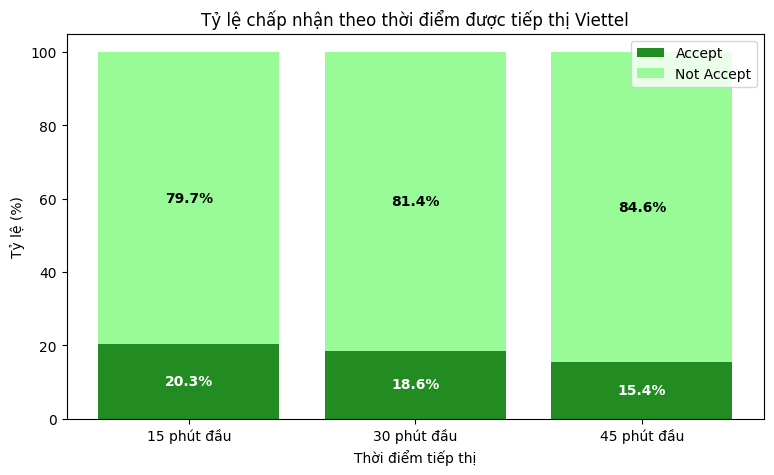

In [ ]:
# Dùng stack bar chart để thể hiện tỷ lệ accept và not accept giữa các nhóm tiếp thị viettel_no_0, 1, 2
labels = ['15 phút đầu', '30 phút đầu', '45 phút đầu']
cols = ['viettel_no_0', 'viettel_no_1', 'viettel_no_2']

accept_rates = []
reject_rates = []

for col in cols:
    # Lọc nhóm khách được tiếp thị ở mốc thời gian đó
    tmp = df_train[df_train[col] == 1]

    # Tính tổng accept và suggestions
    total_accept = tmp['number_of_accept'].sum()
    total_suggest = tmp['number_of_suggestions'].sum()

    # Tính tỷ lệ
    acc_rate = total_accept / total_suggest * 100
    rej_rate = 100 - acc_rate

    accept_rates.append(acc_rate)
    reject_rates.append(rej_rate)

# Vẽ stacked bar chart
plt.figure(figsize=(9,5))
# Màu xanh đậm và xanh nhạt
accept_color = '#228B22'   # xanh đậm
reject_color = '#98FB98'   # xanh nhạt

bars1 = plt.bar(labels, accept_rates, color=accept_color, label='Accept')
bars2 = plt.bar(labels, reject_rates, bottom=accept_rates, color=reject_color, label='Not Accept')

# Hiển thị % ở giữa từng phần
for i in range(len(labels)):
    # phần Accept
    plt.text(i, accept_rates[i]/2, f"{accept_rates[i]:.1f}%",
             ha='center', va='center', color='white', fontweight='bold')

    # phần Not Accept
    plt.text(i, accept_rates[i] + reject_rates[i]/2, f"{reject_rates[i]:.1f}%",
             ha='center', va='center', color='black', fontweight='bold')

plt.title("Tỷ lệ chấp nhận theo thời điểm được tiếp thị Viettel")
plt.xlabel("Thời điểm tiếp thị")
plt.ylabel("Tỷ lệ (%)")
plt.legend()

plt.show()


 **Remarks:** Tỷ lệ chấp nhận giảm dần theo thời gian tiếp thị, với tỷ lệ cao nhất ở **15 phút đầu (20.3%)** và thấp nhất ở **45 phút đầu (15.4%)**.

## **2.8. Tỷ lệ chấp nhận theo thời tiết (weather) & thời điểm tiếp thị**

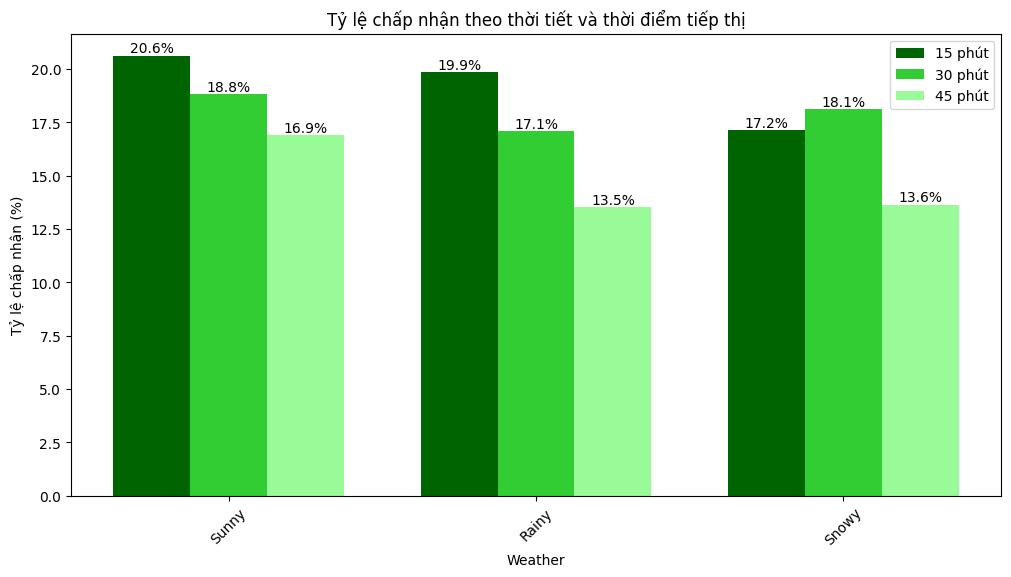

In [ ]:
# Grouped Bar Chart (biểu đồ cột nhóm) thể hiện tỷ lệ accept giữa weather và thời điểm tiếp thị
weathers = df_train['weather'].unique()
cols = ['viettel_no_0', 'viettel_no_1', 'viettel_no_2']
labels = ['15 phút', '30 phút', '45 phút']

rates = {label: [] for label in labels}

for w in weathers:
    df_w = df_train[df_train['weather'] == w]

    for col, label in zip(cols, labels):
        tmp = df_w[df_w[col] == 1]

        total_accept = tmp['number_of_accept'].sum()
        total_suggest = tmp['number_of_suggestions'].sum()

        rate = (total_accept / total_suggest * 100) if total_suggest > 0 else 0
        rates[label].append(rate)

x = np.arange(len(weathers))
width = 0.25

plt.figure(figsize=(12,6))
# màu xanh từ nhạt → đậm
colors = ['#006400', '#32CD32', '#98FB98']
bars1 = plt.bar(x - width, rates['15 phút'], width, color = colors[0], label='15 phút')
bars2 = plt.bar(x,         rates['30 phút'], width, color = colors[1], label='30 phút')
bars3 = plt.bar(x + width, rates['45 phút'], width, color = colors[2], label='45 phút')

plt.xticks(x, weathers, rotation=45)
plt.xlabel("Weather")
plt.ylabel("Tỷ lệ chấp nhận (%)")
plt.title("Tỷ lệ chấp nhận theo thời tiết và thời điểm tiếp thị")
plt.legend()
# Hiển thị % trên mỗi cột
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2,
                 height,
                 f"{height:.1f}%",
                 ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
plt.show()

**Remarks:** Tiếp thị sớm trong **15 phút đầu** mang lại tỷ lệ chấp nhận cao nhất, đặc biệt **khi thời tiết nắng ráo**. Hiệu quả **giảm dần khi tiếp thị muộn** hơn (30–45 phút).

# **3. Phân tích sản phẩm**

In [ ]:
# Đọc thêm file clean_mobile_plan_user.csv để phân tích sản phẩm
df_1 = pd.read_csv('clean_mobile_plan_user.csv')

In [ ]:
df_1.head()

,id,mobile_plan,accept
0,11156.0,DATASILVER,1.0
1,4297.0,SOCIALMEDIAGOLD,1.0
2,13301.0,DATASILVER,1.0
3,9920.0,SOCIALMEDIAGOLD,1.0
4,8424.0,DATASILVER,1.0


## **3.1. Tỉ lệ chấp nhận theo gói data**

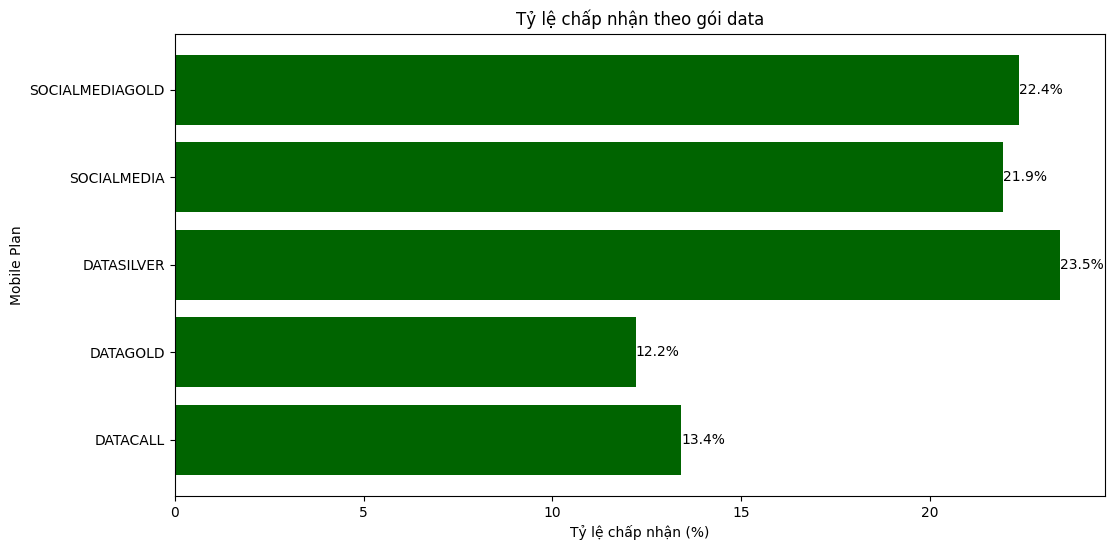

In [ ]:
# Group theo mobile_plan
plan_stats = df_1.groupby('mobile_plan').agg(
    total_suggest=('accept', 'count'),   # tổng số lần được gợi ý
    total_accept=('accept', 'sum')       # số lần được chấp nhận
)

# Tính tỷ lệ accept (%)
plan_stats['accept_rate'] = plan_stats['total_accept'] / plan_stats['total_suggest'] * 100

# Vẽ bar chart theo accept_rate
plt.figure(figsize=(12,6))
plt.barh(plan_stats.index, plan_stats['accept_rate'], color='darkgreen')

plt.title("Tỷ lệ chấp nhận theo gói data")
plt.ylabel("Mobile Plan")
plt.xlabel("Tỷ lệ chấp nhận (%)")
S
# Hiển thị giá trị % trên mỗi cột
for i, value in enumerate(plan_stats['accept_rate']):
    plt.text(value, i, f"{value:.1f}%", va='center')

plt.show()

**Remark:**
- **DATASILVER** (23.5%): Gói cước có tỷ lệ chuyển đổi cao nhất. Lý do có thể là giá cả phải chăng, phù hợp với nhu cầu cơ bản của khách du lịch ngắn ngày hoặc sinh viên.
- **SOCIALMEDIAGOLD** (22.4%) & **SOCIALMEDIA** (21.9%): Các gói tập trung vào mạng xã hội có hiệu suất rất tốt, phản ánh nhu cầu check-in, liên lạc qua OTT của khách du lịch hiện đại.
- **DATACALL** (13.4%): Khách quốc tế ít có nhu cầu gọi thoại nội địa.
- **DATAGOLD** (12.2%): Tỷ lệ thấp nhất, có thể do mức giá cao hoặc dung lượng quá dư thừa so với nhu cầu thực tế.

- Price Sensitivity: Khách hàng ưu tiên gói DATASILVER hơn DATAGOLD, khẳng định lại chân dung khách hàng trẻ/sinh viên tiết kiệm chi phí.

- Social First: Nhu cầu Mạng xã hội và Data lấn át hoàn toàn nhu cầu Thoại.

- Chiến lược: Tập trung đẩy mạnh DATASILVER và SOCIALMEDIA làm sản phẩm chủ lực. Cân nhắc tái cấu trúc hoặc giảm giá cho DATAGOLD

## **3.2. Tỷ lệ khách hàng theo số gói khác nhau đã đăng ký**

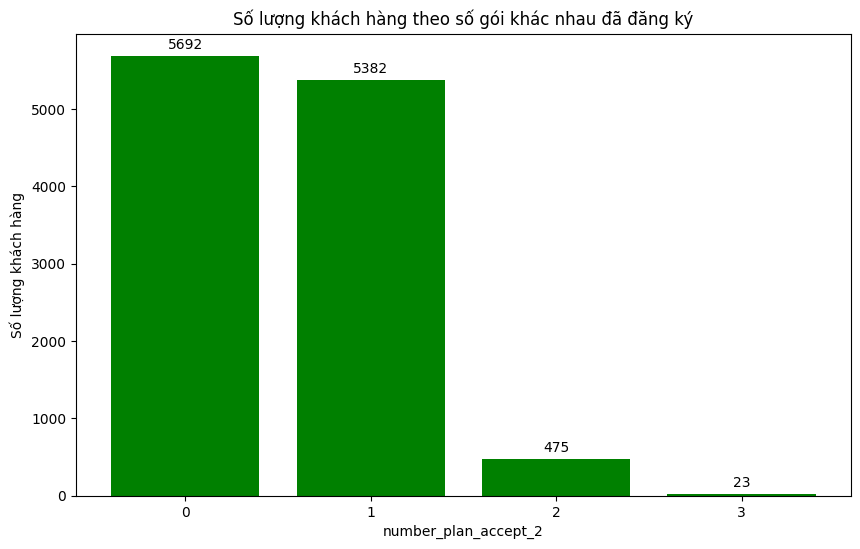

In [ ]:
# Đếm số lượng khách hàng theo số gói đăng ký
plan_counts = df_train['number_of_accept_2'].value_counts().sort_index()

# Vẽ bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(
    plan_counts.index,
    plan_counts.values,
    color='green'
)

# Thêm số liệu trên cột
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # vị trí ngang
        height + 50,                      # vị trí dọc (cách cột 50 units)
        f'{int(height)}',                  # số liệu hiển thị
        ha='center', va='bottom'
    )

plt.xlabel('number_plan_accept_2')
plt.ylabel('Số lượng khách hàng')
plt.title('Số lượng khách hàng theo số gói khác nhau đã đăng ký')
plt.xticks(plan_counts.index)
plt.show()

## **3.3. Số gói đăng kí theo số lượng khách hàng**


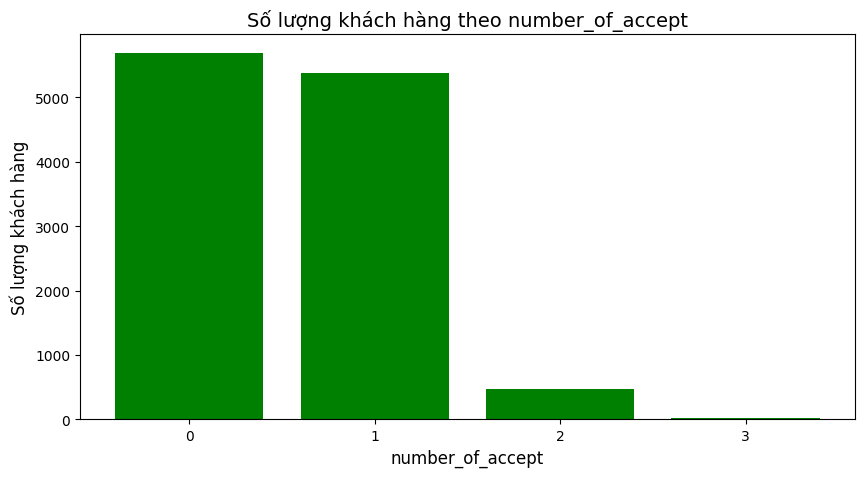

In [ ]:
accept_counts = df_train["number_of_accept"].value_counts().sort_index()
accept_counts

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(accept_counts.index.astype(int), accept_counts.values, color="green")

plt.title("Số lượng khách hàng theo number_of_accept", fontsize=14)
plt.xlabel("number_of_accept", fontsize=12)
plt.ylabel("Số lượng khách hàng", fontsize=12)
plt.xticks(accept_counts.index.astype(int))

plt.show()


**Remark:**

**Nhóm phổ biến (0-1 gói):** Chiếm tỷ trọng áp đảo với tổng cộng hơn 11.000 khách hàng. Số lượng khách hàng chấp nhận 1 gói (5.382) gần tương đương với số lượng khách hàng chưa đăng ký (5.692), cho thấy khả năng thu hút khách hàng mới (acquisition) ở mức ổn định.

**Nhóm cao cấp (2-3 gói):** Có sự gãy khúc lớn về số lượng khi chuyển từ 1 gói sang 2 gói (giảm từ 5.382 xuống 475). Số lượng khách hàng sở hữu 3 gói là không đáng kể (23 khách hàng).

**Insight:** Hiện tượng này chỉ ra rằng mặc dù doanh nghiệp thành công trong việc bán gói đầu tiên, nhưng việc thúc đẩy khách hàng đăng ký thêm các gói bổ sung (cross-sell) đang gặp rào cản lớn.

## **3.4. Số lượt đăng kí và số lượt đề xuất**

<Figure size 1200x600 with 0 Axes>

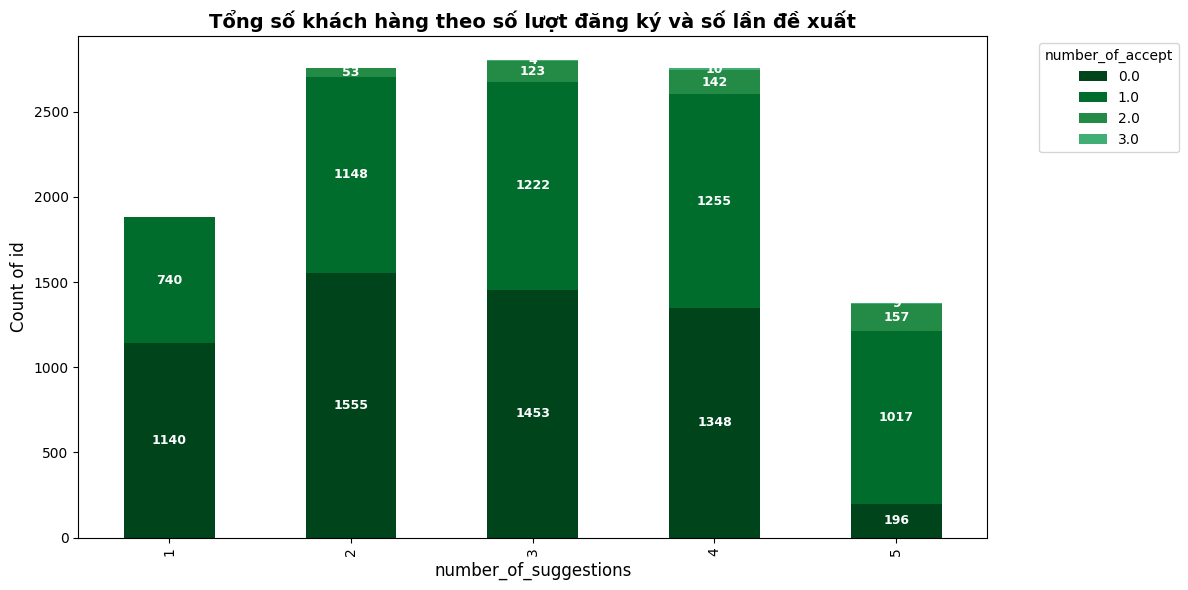

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Pivot bảng đếm
pivot = df_train.pivot_table(
    index="number_of_suggestions",
    columns="number_of_accept",
    aggfunc="size",
    fill_value=0
)

# Màu xanh lá đậm → nhạt
colors = ["#00441b", "#006d2c", "#238b45", "#41ae76", "#66c2a4", "#99d8c9"]

plt.figure(figsize=(12, 6))
ax = pivot.plot(
    kind="bar",
    stacked=True,
    color=colors,
    figsize=(12, 6)
)

plt.title("Tổng số khách hàng theo số lượt đăng ký và số lần đề xuất",
          fontsize=14, fontweight='bold')
plt.xlabel("number_of_suggestions", fontsize=12)
plt.ylabel("Count of id", fontsize=12)
plt.legend(title="number_of_accept", bbox_to_anchor=(1.05, 1), loc='upper left')

# ============================
#  THÊM LABEL TRÊN MỖI STACK
# ============================
for i, (index, row) in enumerate(pivot.iterrows()):
    cumulative = 0
    for j, value in enumerate(row):
        if value > 0:
            ax.text(
                i,                         # vị trí x
                cumulative + value / 2,    # vị trí y (giữa đoạn stack)
                str(value),                # nội dung label
                ha='center', va='center',
                fontsize=9, color='white', fontweight='bold'
            )
        cumulative += value

plt.tight_layout()
plt.show()


**Remark**
- Khi số lần đề xuất là 2 hoặc 3 lần, tổng số khách hàng tương tác là cao nhất.

- Tuy nhiên, khi đề xuất quá nhiều (5 lần), số lượng khách hàng giảm mạnh. Điều này cho thấy việc spam đề xuất không mang lại hiệu quả, thậm chí gây phản tác dụng.

Số lượt chấp nhận (Accept):

- Phần lớn khách hàng chỉ chấp nhận 1 lần (màu xanh đậm thứ 2 từ dưới lên).
Rất ít khách hàng chấp nhận 2 hoặc 3 lần (các phần màu xanh nhạt hơn ở trên cùng).

-> Insight: Chỉ nên đề xuất tối đa 2-3 lần. Đề xuất quá nhiều lần thứ 4, 5 không làm tăng đáng kể lượng khách hàng chấp nhận mà còn làm giảm trải nghiệm.
